# HarvardX PH526X Week 3 Homework 4: Case Study 2

In [73]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [55]:
# directories/files in current working directory
os.listdir()

['ph526hw4.py.ipynb',
 'ph526hw3.py.ipynb',
 'protein.txt',
 '.ipynb_checkpoints',
 'computeWordFrequency.py',
 'plottingBookStat.py',
 'readingBook.py',
 'romeojuliet.txt',
 'readingMultipleFiles.py',
 'countingWords.py',
 'dna.txt',
 'compareTranslation.py',
 'pandasIntro.py']

In [56]:
# function count_words_fast, loaded in DataCamp
def count_words_fast(text):
    """
    Count the number of times each word occurs in the
    text (str). Return dictionary where keys are unique
    words and values are word counts. Skip punctuations.
    """
    text = text.lower()
    skips = [".",",",";",":","'",'"']
    
    for char in skips:
        text = text.replace(char, "")
    
    word_counts = Counter(text.split(" "))
    return word_counts

In [57]:
word_counts = count_words_fast(text); word_counts

Counter({'': 12183,
         'slaughterd': 3,
         'over': 2,
         'see': 38,
         'current': 1,
         'able': 2,
         'eagle': 1,
         'him]': 1,
         'simon': 1,
         'tybalt?': 3,
         'lake': 1,
         'forbear': 2,
         'ebb': 1,
         'hangs': 2,
         'pursuing': 1,
         'guests': 3,
         'gossamer': 1,
         'abuse': 1,
         'shake': 2,
         'possessd': 2,
         'son-in-law': 1,
         'sole': 2,
         'enanmourd': 1,
         'paramour?': 1,
         'promisd': 1,
         'he': 119,
         'every': 11,
         'lookd': 2,
         'wrought': 2,
         'maximum': 1,
         'agile': 1,
         'parting': 1,
         'north': 2,
         'otherways': 1,
         'outrage': 1,
         'wehave': 1,
         'price': 2,
         'ends': 1,
         'else': 11,
         'taking': 2,
         'murdered': 1,
         'cease': 4,
         'wine': 1,
         'assembly': 1,
         'oddly': 1,
         '

In [58]:
# function word_stats, loaded in DataCamp
def word_stats(word_counts):
    """
    Return number of unique words and word frequencies.
    """
    num_unique = len(word_counts)
    counts = word_counts.values()
    return (num_unique, counts)

In [59]:
# function read_book, loaded in DataCamp
def read_book(title_path):
    """
    Read a book and return it as a string.
    """
    with open(title_path, "r", encoding="utf8") as current_file:
        text = current_file.read()
        text = text.replace("\n", "").replace("\r", "")
    return text

### Exercise 1

In [60]:
# preload Romeo and Juliet as text
text = read_book("romeojuliet.txt")

# function word_count_distribution(text)
def word_count_distribution(text):
    """
    Take a book string and outputs a dictionary with items corresponding
    to the count of times a collection of words appears in the translation
    and values corresponding to the number of number of words that appear
    with that frequency.
    """
    word_counts = count_words_fast(text)
    return Counter(word_counts.values())

distribution = word_count_distribution(text); distribution

Counter({1: 3128,
         2: 746,
         3: 310,
         4: 189,
         5: 123,
         6: 86,
         7: 64,
         8: 30,
         9: 50,
         10: 41,
         11: 32,
         12: 26,
         13: 18,
         14: 22,
         15: 10,
         16: 12,
         17: 13,
         18: 11,
         19: 10,
         20: 7,
         21: 10,
         22: 5,
         23: 11,
         24: 5,
         25: 8,
         26: 7,
         27: 3,
         28: 3,
         29: 4,
         30: 3,
         31: 2,
         32: 2,
         33: 1,
         34: 1,
         35: 2,
         36: 3,
         37: 1,
         38: 2,
         39: 1,
         40: 1,
         41: 3,
         42: 3,
         43: 1,
         45: 4,
         46: 1,
         47: 3,
         48: 2,
         49: 3,
         50: 2,
         51: 2,
         52: 2,
         53: 1,
         54: 5,
         56: 1,
         57: 2,
         58: 1,
         60: 2,
         61: 3,
         62: 3,
         63: 2,
         64: 3,
      

### Exercise 2

In [61]:
# function more_frequent(distribution)
def more_frequent(distribution):
    """
    Take a word frequency dictionary (like that made in Exercise 1) and 
    output a dictionary with the same keys as those in distribution (the
    number of times a group of words appears in the text), and values 
    corresponding to the fraction of words that occur with more frequency 
    than that key.
    """
    counts = sorted(distribution.keys())
    sorted_words_frequencies = sorted(distribution.values(), reverse = True)
    cumulative_words_frequencies = np.cumsum(sorted_words_frequencies)
    frequencies_fraction = 1 - cumulative_words_frequencies / len(distribution)
    return dict(zip(counts, frequencies_fraction))

In [67]:
results = more_frequent(distribution)

### Exercise 3

In [72]:
# book_dir is only available in DataCamp exercise, not here
hamlets = pd.DataFrame(columns=("language", "distribution"))
book_dir = "Books"
title_num = 1
for language in book_titles:
    for author in book_titles[language]:
        for title in book_titles[language][author]:
            if title == "Hamlet":
                inputfile = data_filepath+"Books/"+language+"/"+author+"/"+title+".txt"
                text = read_book(inputfile)
                distribution = word_count_distribution(text)
                hamlets.loc[title_num] = language, distribution
                title_num += 1

NameError: name 'book_titles' is not defined

### Exercise 4

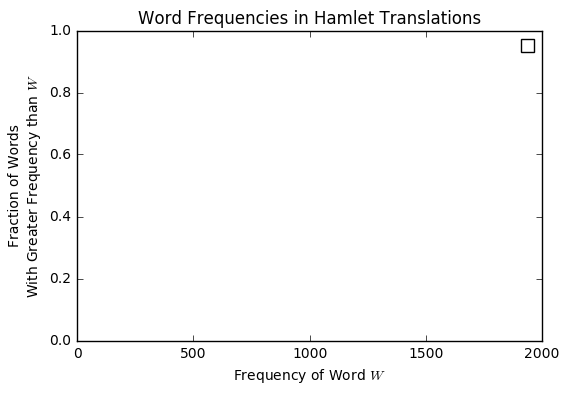

In [75]:
# again, required data is not available in this file but only on DataCamp
colors = ["crimson", "forestgreen", "blueviolet"]
handles, hamlet_languages = [], []
for index in range(hamlets.shape[0]):
    language, distribution = hamlets.language[index+1], hamlets.distribution[index+1]
    dist = more_frequent(distribution)
    plot, = plt.loglog(sorted(list(dist.keys())),sorted(list(dist.values()),
        reverse = True), color = colors[index], linewidth = 2)
    handles.append(plot)
    hamlet_languages.append(language)
plt.title("Word Frequencies in Hamlet Translations")
xlim    = [0, 2e3]
xlabel  = "Frequency of Word $W$"
ylabel  = "Fraction of Words\nWith Greater Frequency than $W$"
plt.xlim(xlim); plt.xlabel(xlabel); plt.ylabel(ylabel)
plt.legend(handles, hamlet_languages, loc = "upper right", numpoints = 1)
plt.show()